Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline
warnings.filterwarnings("ignore")

Read the data set, Traning dataset , Test dataset

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The taining dataset has 891 entries and 12 data column including target variable(survived)
Among then 2 float type data, 5 are integer, and 5 are object

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. 
We can also see that the passenger ages range from 0.4 to 80.

In [7]:
# Preview the data

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Numerical and alpha numeric data within the same feature,
Ticket is mix of numeric and alphanumeric data types, Cabin is alphanumeric

In [8]:
train_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [9]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Cabin, Age,Embarked features contain a number of null values 

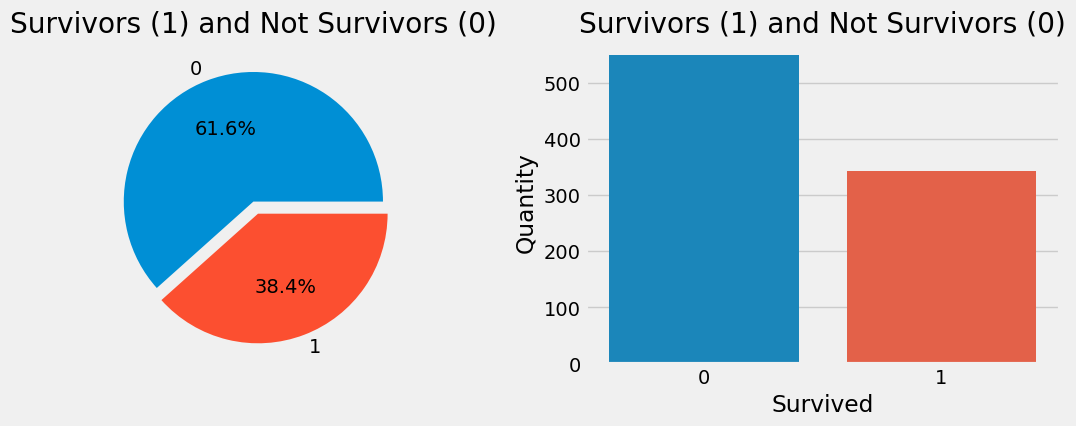

In [11]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
train_data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Survivors (1) and Not Survivors (0)')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=train_data, ax=ax[1])  # Specify 'x' to represent the data column
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and Not Survivors (0)')

plt.show()

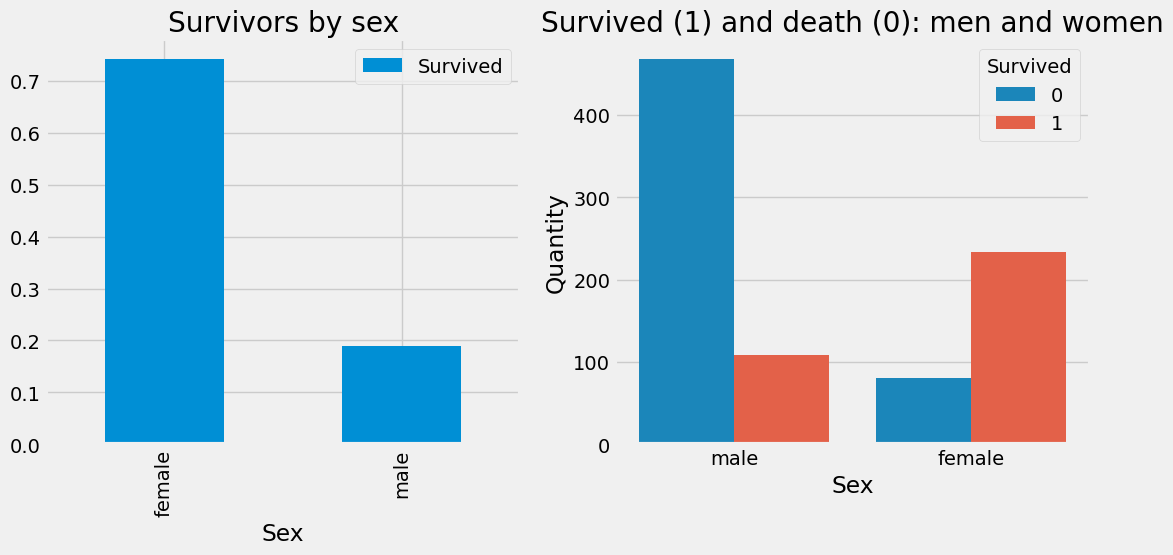

In [12]:

f, ax = plt.subplots(1, 2, figsize=(12, 5)) 
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by sex') 
sns.countplot(x='Sex', hue='Survived', data=train_data, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and death (0): men and women') 
plt.show()

---------------------Data Preprocessing--------------------------

Here we drop unnecessary feature and convert string data into numerical data for easier training.

We will drop the the Cabin feature since not a lot more useful information can be extracted from it

In [11]:

# Create a new column cabin_New indicating 
# if the cabin value was given or was NaN 

train_data["Cabin_new"] = (train_data["Cabin"].notnull().astype("int"))
test_data["Cabin_new"] = (test_data["Cabin"].notnull().astype("int"))

#Delete the column "Cabin" from test and triaing data set

train_data = train_data.drop(["Cabin"], axis = 1)
test_data = test_data.drop(["Cabin"], axis = 1)

In [12]:
#We can also drop the Ticket feature since it’s unlikely to yield any useful information

train_data = train_data.drop(['Ticket'], axis=1) 
test_data = test_data.drop(['Ticket'], axis=1) 

In [13]:
# There are missing values in the Embarked feature. For that, we will replace the NULL 
# values with ‘S’ as the number of Embarks for ‘S’ are higher than the other two.

train_data = train_data.fillna({"Embarked" : "S"})

We will now sort the age into groups. We will combine the age groups of the people and categorize them into the same groups.
BY doing so we will be having fewer categories and will have a better prediction since it will be a categorical dataset.

In [16]:
train_data["Age"] = train_data["Age"].fillna(-0.5)
test_data["Age"] = test_data["Age"].fillna(-0.5)
                                                                                                                                        
bins = [-1,0,5,12,18,24,35,60, np.inf]
labels = ["Unknown" , "Baby" , "Child" , "TeenAge" , "Student" , "Young Adult" , "Adult" , "Senoir"]

train_data["AgeGroup"] = pd.cut(train_data["Age"],bins, labels=labels)
test_data["AgeGroup"] = pd.cut(test_data["Age"],bins, labels=labels)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data['AgeGroup'] = label_encoder.fit_transform(train_data['AgeGroup'])
test_data['AgeGroup'] = label_encoder.transform(test_data['AgeGroup'])


In [17]:
train_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,AgeGroup
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,7.8958,S,0,7
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,10.5167,S,0,4
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,10.5000,S,0,7
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,S,0,7
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q,0,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,7
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.4500,S,0,6
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,7
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.7500,Q,0,7


In the ‘title’ column for both the test and train set, we will categorize them into an equal number of classes. Then we will assign numerical values to the title for convenience of model training.

In [18]:
#combine the train and test dataset
combine = [train_data, test_data]

#Extract the title for each name in tarin and test dataset
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract("([A-Za-z]+)\.", expand = False)
    
pd.crosstab(train_data["Title"], train_data["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
#We can replace many titles with a more common name or classify them as Rare

for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(["Lady","Capt","Col","Don","Dr","Major","Rev","Jonkheer","Dona"],"Rare")
    
    dataset["Title"] = dataset["Title"].replace(["Countess","Lady","Sir"],"Royal")
    dataset["Title"] = dataset["Title"].replace("Mlle","Miss")
    dataset["Title"] = dataset["Title"].replace("Ms","Miss")
    dataset["Title"] = dataset["Title"].replace("Mme","Mrs")
    
train_data[["Title", "Survived"]].groupby(["Title"], as_index = False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [20]:
# We can convert the categorical titles to a numerical value.

title_mapping = {"Mr" : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Royal" : 5, "Rare" : 6}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,7,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,7,1


In [21]:
# Now we can drop the Name feature from traing and testing datasets, We also do not need the passenger

train_data = train_data.drop(["Name"], axis =1)
test_data = test_data.drop(["Name"], axis =1)

combine = [train_data, test_data]


In [22]:
# Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,AgeGroup,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0,4,1
1,2,1,1,1,38.0,1,0,71.2833,C,1,0,3
2,3,1,3,1,26.0,0,0,7.9250,S,0,7,2
3,4,1,1,1,35.0,1,0,53.1000,S,1,7,3
4,5,0,3,0,35.0,0,0,8.0500,S,0,7,1


In [24]:
'''
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

''' 
                                                                                                                          
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}

train_data["Embarked"] = train_data["Embarked"].map(embarked_mapping)
test_data["Embarked"] = test_data["Embarked"].map(embarked_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new,AgeGroup,Title
0,1,0,3,0,22.0,1,0,7.2500,1,0,4,1
1,2,1,1,1,38.0,1,0,71.2833,2,1,0,3
2,3,1,3,1,26.0,0,0,7.9250,1,0,7,2
3,4,1,1,1,35.0,1,0,53.1000,1,1,7,3
4,5,0,3,0,35.0,0,0,8.0500,1,0,7,1


In [25]:
#Fill in the missing Fare value in the test set based on the mean fare for that P-class

for i in range(len(test_data["Fare"])):
    if pd.isnull(test_data["Fare"][i]):
        pclass = test_data["Pclass"][i] 
        test_data["Fare"][i] = round(train_data[train_data["Pclass"] == pclass] ["Fare"].mean(),4)



In [26]:
#map Fare values into groups of numerical values

train_data["FareBand"] = pd.qcut(train_data["Fare"],4, labels = [1,2,3,4])

test_data["FareBand"] = pd.qcut(test_data["Fare"],4, labels = [1,2,3,4])


In [27]:
#drop the Fare values

train_data = train_data.drop(["Fare"], axis = 1)

test_data = test_data.drop(["Fare"], axis = 1)


train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_new,AgeGroup,Title,FareBand
0,1,0,3,0,22.0,1,0,1,0,4,1,1
1,2,1,1,1,38.0,1,0,2,1,0,3,4
2,3,1,3,1,26.0,0,0,1,0,7,2,2
3,4,1,1,1,35.0,1,0,1,1,7,3,4
4,5,0,3,0,35.0,0,0,1,0,7,1,2
5,6,0,3,0,-0.5,0,0,3,0,6,1,2
6,7,0,1,0,54.0,0,0,1,1,0,1,4
7,8,0,3,0,2.0,3,1,1,0,1,4,3
8,9,1,3,1,27.0,0,2,1,0,7,3,2
9,10,1,2,1,14.0,1,0,2,0,5,3,3


In [28]:
test_data.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_new,AgeGroup,Title,FareBand
0,892,3,0,34.5,0,0,3,0,7,1,1
1,893,3,1,47.0,1,0,1,0,0,3,1
2,894,2,0,62.0,0,0,3,0,3,1,2
3,895,3,0,27.0,0,0,1,0,7,1,2
4,896,3,1,22.0,1,1,1,0,4,3,2
5,897,3,0,14.0,0,0,1,0,5,1,2
6,898,3,1,30.0,0,0,3,0,7,2,1
7,899,2,0,26.0,1,1,1,0,7,1,3
8,900,3,1,18.0,0,0,2,0,5,3,1
9,901,3,0,21.0,2,0,1,0,4,1,3


In [29]:
#Model Training

from sklearn.model_selection import train_test_split 

# Drop the Survived and PassengerId 
# column from the trainset 
predictors = train_data.drop(['Survived', 'PassengerId'], axis=1) 
target = train_data["Survived"] 
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0) 


In [30]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Embarked,Cabin_new,AgeGroup,Title,FareBand
140,3,1,-0.5,0,2,2,0,6,3,3
439,2,0,31.0,0,0,1,0,7,1,2
817,2,0,31.0,1,1,2,0,7,1,4
378,3,0,20.0,0,0,2,0,4,1,1
491,3,0,21.0,0,0,1,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...
835,1,1,39.0,1,1,2,1,0,2,4
192,3,1,19.0,1,0,1,0,4,2,1
629,3,0,-0.5,0,0,3,0,6,1,1
559,3,1,36.0,1,0,1,0,0,3,3


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Fit the traing the data
randomforest = RandomForestClassifier(n_estimators =100)
randomforest.fit(x_train, y_train)

y_pred = randomforest.predict(x_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy is : ",accuracy)

Accuracy is :  83.8


A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data
The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by 
the model on the test data.

In [36]:
# Confusion Matrix

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
prediction = cross_val_predict (randomforest, x_train, y_train, cv = 3)
confusion_matrix(y_train, prediction)

array([[376,  63],
       [ 73, 200]])

Recall tells us how many of the actual positive cases we were able to predict correctly with our model.

Precision tells us how many of the correct predicted cases turned out to be positive. 

In [37]:
# Precision and Recall

from sklearn.metrics import precision_score, recall_score

print("Precision : " ,precision_score(y_train, prediction))

print("Recall : ", recall_score(y_train, prediction))

  

Precision :  0.7604562737642585
Recall :  0.7326007326007326


It's a combination of precision and recall, which are two other important evaluation metrics in machine learning.

In [38]:
# F-Score

from sklearn.metrics import f1_score
f1_score(y_train, prediction)

0.7462686567164178